# Introduction

What makes a neighborhood *the best*? Is it aggregate income, the safety of the neighborhood, or overall quality of life? Personally, I believe it is a large combination of factors which make a neighborhood *the best*. The search for adequate metrics to rank neighborhoods wasn't all too hard. To start, we thought it necessary to include the safety of a neighborhood, because nobody wants to feel unsafe in their own home. This was why we chose to look at the overall crime rate of Pittsburgh neighborhoods. A lower crime rate indicates a safer environment for family and individual life. Crime rate isn't the only factor of *the best* neighborhood, however. In our current climate, COVID-19 cases are crucial to the safety and wellbeing of a neighborhood. For this reason, we chose to take a deeper dive into the numbers of COVID-19 cases and deaths per neighborhood. Neighborhoods with significantly higher infection and death rates could be seen as unsafe, unsanitary, or any other multitude of adjectives. Finally, I chose to research the public facilities in Pittsburgh neighborhoods. By public facilities, I mean buildings such as fire stations, police stations, schools, libraries, parks, etc. I believe this encompasses multiple important factors in the quality of a neighborhood; such as happiness/quality of life from parks and recreational facilities, to safety and security from fire stations and police stations. 

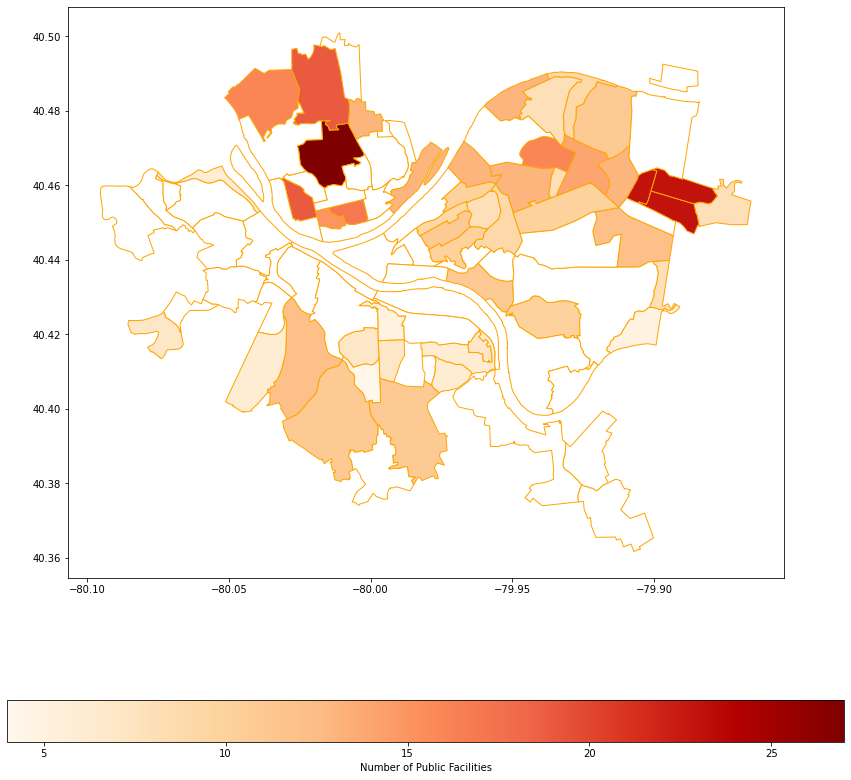

In [55]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

# reading public facilities csv file into dataframe
public_facilities_csv = "Public_Facilities.csv"
public_facilities = pd.read_csv("Public_Facilities.csv") 

# renaming column "neighborhood" to "Neighborhood" to help with data merging later on
public_facilities = public_facilities.rename(columns = {'neighborhood': 'Neighborhood'})

# removing unnecessary columns
del public_facilities['facility name']
del public_facilities['facility subtype']

# creating a frequency counter to count # of facilities per neighborhood
public_facilities['Frequency'] = public_facilities.groupby('Neighborhood')['Neighborhood'].transform('count')

# dropping the dupes to keep data clean
public_facilities = public_facilities.drop_duplicates('Neighborhood', keep='last')

# sorting by frequency
public_facilities = public_facilities.sort_values(by=['Frequency'], ascending=False)

public_facilities.rename(columns = {'Lawrenceville':'Central Lawrenceville', 'Crafton Heights - Westwood - Oakwood':'Crafton Heights',
                     'Hazelwood-Glenwood-Glen Hazel' : 'Hazelwood', 'Lower Oakland' : 'South Oakland', 'Mount Washington - Duquesne Heights' :
                     'Mount Washington', 'Ridgemont - Chicken Hill' : 'Ridgemont', 'Sheraton Chartiers' : 'Sheradon',
                     'Southside Flats' : 'South Side Flats', 'Southside Slopes' : 'South Side Slopes', 'Spring Hill' :
                     'Spring Hill-City View', 'The Strip' : 'Strip District', '31st Ward':'Hays', 'West End Valley' : 'West End',
                     'Squirrel Hill - North of Forbes' : 'Squirrel Hill North', 'Squirrel Hill - South of Forbes' :
                     'Squirrel Hill South', 'The Bluff' : 'Bluff', 'Harpen Hilltop' : 'Summer Hill',
                     'California Ave.' : 'California-Kirkbride', 'Shadeland Halls Grove' : 'Marshall-Shadeland',
                     'North View Heights' : 'Northview Heights', 'Central North Side':'Central Northside',
                     'East North Side' : 'East Allegheny','Elliot' : 'Elliott','Sheraton Chartiers':'Sheraden'}, inplace = True)

# Mapping frequency of public facilities
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
facilities_map = neighborhoods.merge(public_facilities, how='left', left_on='hood', right_on='Neighborhood')
facilities_map.plot(column = 'Frequency', cmap = 'OrRd', edgecolor = "orange", legend = True, 
                    legend_kwds = {'label': "Number of Public Facilities", 'orientation': "horizontal" }, figsize = (15,15), missing_kwds = {"color": "white"})

# Findings?

In [54]:
public_facilities.head(5)

,Neighborhood,Frequency
585,Perry South,27
373,Homewood South,23
396,Homewood West,23
350,Homewood North,23
181,Central North Side,21


As you can see, I have ranked the top 5 neighborhoods based on the number of public facilites they have. Perry South should take the cake as #1 best neighborhood, all according to my data. Right?

## The Issue

Normally, this way of quantifying the quality of a neighborhood would work just fine, *if* all neighborhoods were the same population. Unfortunately, this is the real world, and not every neighborhood has the same number of people. If a neighborhood has a very low population, it only makes sense that they would have less public facilities. Ranking neighborhoods solely by the number of public facilities would be unfair to communities with a lower population. To solve this issue, I gathered the population of every neighborhood in Pittsburgh, and merged it with my rankings.

In [51]:
# reading population csv into dataframe
population_density_csv = "population-density.csv"
population = pd.read_csv("population-density.csv", index_col = "Neighborhood")

# removing unnecessary columns
population = population.filter(['Neighborhood', 'Pop. 2010'])

In [52]:
# merging both dataframes into one with all required data
final = pd.merge(public_facilities, population, on = "Neighborhood")

# removing commas from the population numbers to allow conversion from string to int
final = final.replace(',','', regex=True)

Now I have a new dataframe with the neighborhood name, number of public facilites, and the population. I can use this dataframe to give each neighborhood a "score." In essence, what I am doing is simply dividing the frequency (# of public facilities) by the population. I then multiplied the score by 100 to give a more easily readable score value.

Text(0, 0.5, 'Score')

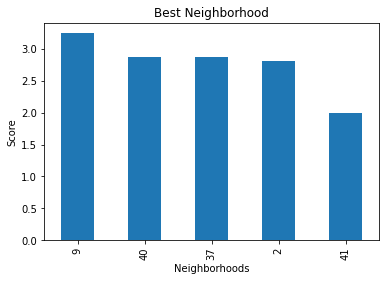

In [53]:
# transforming strings to ints to allow division between columns
final['Pop. 2010'] = final['Pop. 2010'].astype(int)

# dividing
final["Score"] = (final["Frequency"]/final["Pop. 2010"]) * 100

# sorting final dataframe by score
final = final.sort_values(by=['Score'], ascending=False)

# plotting final dataframe
final.groupby("Neighborhood")
final["Score"].head(5).plot(kind = "bar")
plt.title("Best Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Score")

In [46]:
final.head(5)

,Neighborhood,Frequency,Pop. 2010,Score
9,Allegheny West,15,462,3.246753
40,St. Clair,6,209,2.870813
37,Arlington Heights,7,244,2.868852
2,Homewood West,23,818,2.811736
41,Esplen,6,301,1.993355


# Conclusion

As you can see, there is a fairly large disparity between the scores of the top 5 neighborhoods. You may also notice that the top 5 neighborhoods all have less than 1,000 population. Allegheny West takes the number one spot with a score of 3.2. This is because there is a total of 15 public facilities, but only a measly population of 462. Coming in second place is St. Clair, with less public facilities and less population than Allegheny West. In third place is Arlington Heights. The facility count and population is incredibly similar to St. Clair, only getting beaten by 0.01 score. Some other honorable mentions would be Perry South, which has the highest number of public facilities. However, with a much greater populatyin of 4,145 people, The ratio of facilities to people is much lower, ranking it lower on the list. From this data, we can conclude that Allegheny West is one of the most safe, happy, and healthy neighborhoods in Pittsburgh.